## Deep Learning Lunch and Learn, part 2

### Logistic Regression with PyTorch

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In this example, we will use logistic regression to predict whether a passenger on the Titanic would have survived or not. We will use PyTorch to build a logistic regression model and train it on the Titanic dataset.

#### Load the data

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/tbenbrahim/deep-learning-lunch-and-learn/main/data/Cancer_Data.csv"

data_frame = pd.read_csv(url)
data_frame

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [2]:
data_frame.shape

(569, 32)

In [3]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Clean the data

In [4]:
data_frame.drop('id', axis=1, inplace=True)
data_frame['diagnosis'] = data_frame['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
data_frame

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


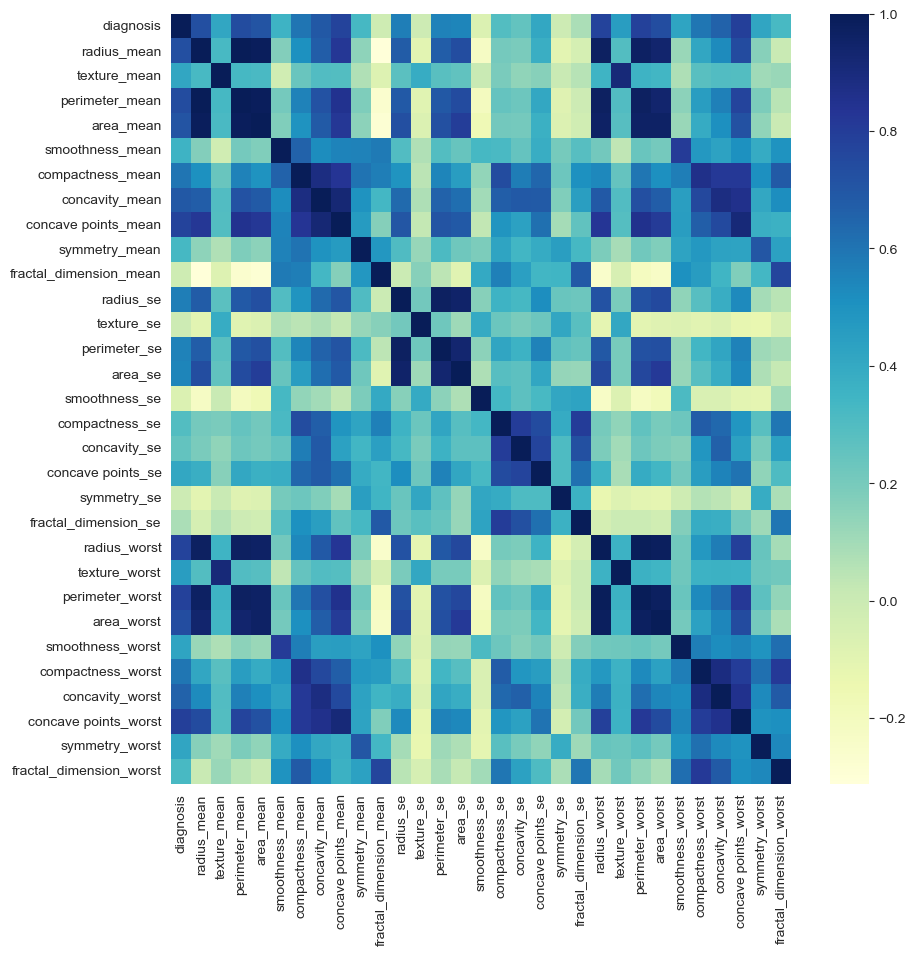

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(data_frame.corr(numeric_only=True), annot=False, cmap="YlGnBu")
plt.show()

In [6]:
data_frame.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


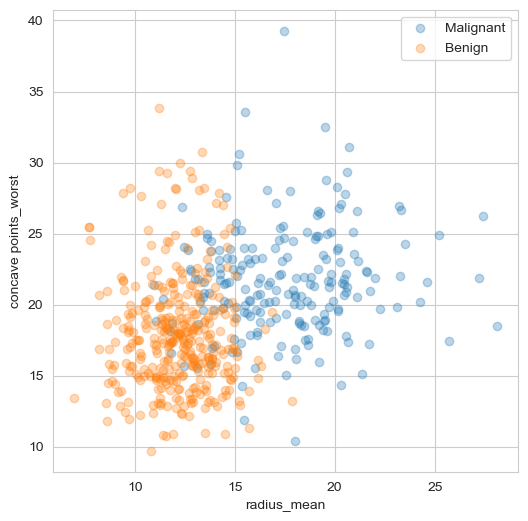

In [7]:
M = data_frame[data_frame.diagnosis == 1]
B = data_frame[data_frame.diagnosis == 0]

plt.figure(figsize=(6, 6))

plt.scatter(M.radius_mean, M.texture_mean, label="Malignant", alpha=0.3)
plt.scatter(B.radius_mean, B.texture_mean, label="Benign", alpha=0.3)

plt.xlabel("radius_mean")
plt.ylabel("concave points_worst")

plt.legend()
plt.show()

I want to check the distribution of the data to predict (diagnosis) and see if it is skewed. If it is skewed, I will need to normalize it.
For example, if the distribution is 99.72% 0 and 0.28% 1, then the model will predict 0 for all inputs. This is called a class imbalance problem.
This can happen for example when working with a fraud detection data. With the numbers given above, the following model is 99.72% accurate with 0 false positives.

```python
def predict_fraud(x):
    return 0
```

<Axes: >

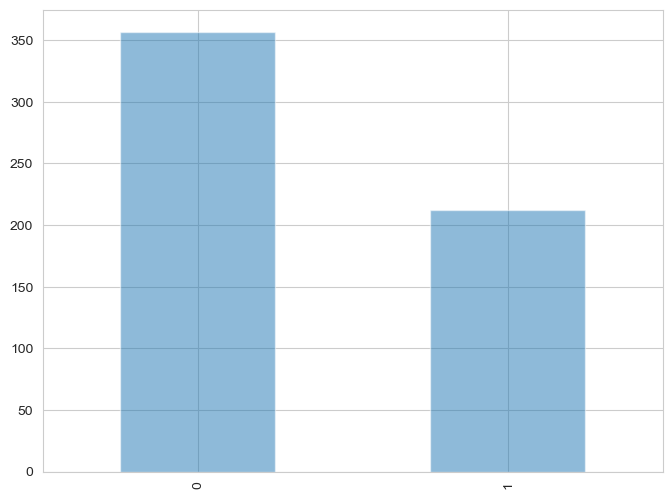

In [8]:
fig = plt.figure(figsize=(8, 6))

data_frame.diagnosis.value_counts(normalize=False).plot(kind="bar", alpha=0.5)

In this case, the distribution is not skewed, so we don't need to normalize it.


### Split the data into training and test sets

In [9]:
from sklearn.model_selection import train_test_split
import numpy as np

X = data_frame.drop('diagnosis', axis=1).to_numpy(dtype=np.float32)
y = data_frame.diagnosis.to_numpy(dtype=np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(455, 30) (455,) (114, 30) (114,)


#### Normalize the data

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Use CUDA if available

In [11]:
import torch

if torch.cuda.is_available():
    dev = "cuda:0"
else:
    dev = "cpu"
device = torch.device(dev)
print("Running on {}".format(dev))

Running on cuda:0


#### Create tensors from the data

In [12]:
X_train = torch.from_numpy(X_train).to(device)
X_test = torch.from_numpy(X_test).to(device)
y_train = torch.from_numpy(y_train).view(y_train.shape[0], 1).to(device)
y_test = torch.from_numpy(y_test).view(y_test.shape[0], 1).to(device)

#### Use a dataset and dataloader to load the data

In [13]:

from torch.utils.data import TensorDataset, DataLoader

train_ds = TensorDataset(X_train, y_train)
test_ds = TensorDataset(X_test, y_test)


#### Create the model

![model](https://raw.githubusercontent.com/tbenbrahim/deep-learning-lunch-and-learn/main/images/30-1.png)

In [14]:
import torch.nn as nn


class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        out = torch.sigmoid(self.linear(x))
        return out


model = LogisticRegression(X_train.shape[1], 1).to(device)


#### Define the hyperparameters

In [15]:
learning_rate = 0.01
num_epochs = 1000
batch_size = 32
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#### Train the model

In [16]:
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=batch_size, shuffle=True)

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_dl):
        optimizer.zero_grad()

        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        # Backward and optimize
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, loss.item()))

Epoch [100/1000], Loss: 0.0975
Epoch [200/1000], Loss: 0.0806
Epoch [300/1000], Loss: 0.0730
Epoch [400/1000], Loss: 0.0684
Epoch [500/1000], Loss: 0.0652
Epoch [600/1000], Loss: 0.0628
Epoch [700/1000], Loss: 0.0609
Epoch [800/1000], Loss: 0.0594
Epoch [900/1000], Loss: 0.0581
Epoch [1000/1000], Loss: 0.0570


#### Evaluate the model with the test data

In [17]:

with torch.no_grad():
    y_hat = model(X_test)
    y_hat = y_hat.round()
    acc = y_hat.eq(y_test).sum() / float(y_test.shape[0])
    print(f'Accuracy: {acc * 100:.2f}%')

Accuracy: 98.25%


#### Display the confusion matrix

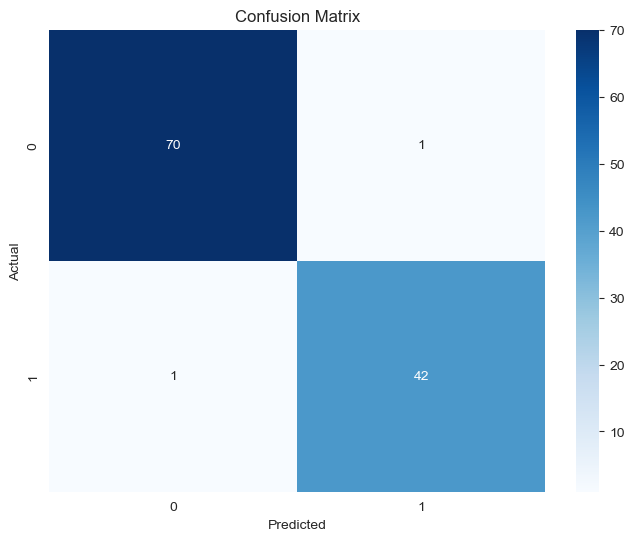

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test.cpu(), y_hat.cpu())
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", ax=ax, cmap="Blues")
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
plt.show()



#### The whole code

In [19]:
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

url = "https://raw.githubusercontent.com/tbenbrahim/deep-learning-lunch-and-learn/main/data/Cancer_Data.csv"
data_frame = pd.read_csv(url)

data_frame.drop('id', axis=1, inplace=True)
data_frame['diagnosis'] = data_frame['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

X = data_frame.drop('diagnosis', axis=1).to_numpy(dtype=np.float32)
y = data_frame.diagnosis.to_numpy(dtype=np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

if torch.cuda.is_available():
    dev = "cuda:0"
else:
    dev = "cpu"
device = torch.device(dev)

X_train = torch.from_numpy(X_train).to(device)
X_test = torch.from_numpy(X_test).to(device)
y_train = torch.from_numpy(y_train).view(y_train.shape[0], 1).to(device)
y_test = torch.from_numpy(y_test).view(y_test.shape[0], 1).to(device)


class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))


model = LogisticRegression(X_train.shape[1], 1).to(device)

learning_rate = 0.01
num_epochs = 1000
batch_size = 32
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=batch_size, shuffle=True)

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_dl):
        y_hat = model(X_train)
        loss = criterion(y_hat, y_train)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    if (epoch + 1) % 50 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, loss.item()))

with torch.no_grad():
    y_hat = model(X_test)
    y_hat = y_hat.round()
    acc = y_hat.eq(y_test).sum() / float(y_test.shape[0])
    print(f'Accuracy: {acc * 100:.2f}%')


Epoch [50/1000], Loss: 0.1197
Epoch [100/1000], Loss: 0.0959
Epoch [150/1000], Loss: 0.0855
Epoch [200/1000], Loss: 0.0794
Epoch [250/1000], Loss: 0.0753
Epoch [300/1000], Loss: 0.0722
Epoch [350/1000], Loss: 0.0697
Epoch [400/1000], Loss: 0.0678
Epoch [450/1000], Loss: 0.0661
Epoch [500/1000], Loss: 0.0647
Epoch [550/1000], Loss: 0.0635
Epoch [600/1000], Loss: 0.0624
Epoch [650/1000], Loss: 0.0614
Epoch [700/1000], Loss: 0.0606
Epoch [750/1000], Loss: 0.0598
Epoch [800/1000], Loss: 0.0591
Epoch [850/1000], Loss: 0.0585
Epoch [900/1000], Loss: 0.0579
Epoch [950/1000], Loss: 0.0573
Epoch [1000/1000], Loss: 0.0568
Accuracy: 98.25%
